## L1 - Detailed Metrics and Cross-validation

### Classification example

In [1]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss, confusion_matrix

In [2]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import SGDClassifier

/home/alexburlacu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Without stratification.

In [3]:
X, y = load_breast_cancer(return_X_y=True)
kfold = KFold()

metrics = {"classification_report": [], "roc_auc_score": [], "log_loss": [], "confusion_matrix": []}

for train_split, test_split in kfold.split(X, y):
    sgd = SGDClassifier(loss="log")
    sgd.fit(X[train_split], y[train_split])
    pred_proba = sgd.predict_proba(X[test_split])
    pred = sgd.predict(X[test_split])
    metrics["classification_report"].append(classification_report(y[test_split], pred))
    metrics["confusion_matrix"].append(confusion_matrix(y[test_split], pred))
    metrics["roc_auc_score"].append(roc_auc_score(y[test_split], pred))
    metrics["log_loss"].append(log_loss(y[test_split], pred_proba))
    
    print("Accuracy on the split is", sgd.score(X[test_split], y[test_split]))


Accuracy on the split is 0.9210526315789473
Accuracy on the split is 0.8859649122807017
Accuracy on the split is 0.8596491228070176
Accuracy on the split is 0.7807017543859649
Accuracy on the split is 0.911504424778761


In [4]:
for k, vs in metrics.items():
    print(k)
    [print(f"On split {idx}:\n", v) for idx, v in enumerate(vs)]
    print("\n\n")

classification_report
On split 0:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.85      0.98      0.91        46

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

On split 1:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.91      0.89      0.90        65

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

On split 2:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        40
           1       1.00      0.78      0.88        74

    accuracy                           0.86       114
   macro avg       0.86      0.89      0.86       114
weighted avg 

With stratification.

In [5]:
X, y = load_breast_cancer(return_X_y=True)
skfold = StratifiedKFold()

metrics = {"classification_report": [], "roc_auc_score": [], "log_loss": [], "confusion_matrix": []}

for train_split, test_split in skfold.split(X, y):
    sgd = SGDClassifier(loss="log")
    sgd.fit(X[train_split], y[train_split])
    pred_proba = sgd.predict_proba(X[test_split])
    pred = sgd.predict(X[test_split])
    metrics["classification_report"].append(classification_report(y[test_split], pred))
    metrics["confusion_matrix"].append(confusion_matrix(y[test_split], pred))
    metrics["roc_auc_score"].append(roc_auc_score(y[test_split], pred))
    metrics["log_loss"].append(log_loss(y[test_split], pred_proba))
    
    print("Accuracy on the split is", sgd.score(X[test_split], y[test_split]))

Accuracy on the split is 0.868421052631579
Accuracy on the split is 0.8947368421052632
Accuracy on the split is 0.9122807017543859
Accuracy on the split is 0.9473684210526315
Accuracy on the split is 0.911504424778761


In [6]:
for k, vs in metrics.items():
    print(k)
    [print(f"On split {idx}:\n", v) for idx, v in enumerate(vs)]
    print("\n\n")

classification_report
On split 0:
               precision    recall  f1-score   support

           0       0.97      0.67      0.79        43
           1       0.83      0.99      0.90        71

    accuracy                           0.87       114
   macro avg       0.90      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114

On split 1:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        43
           1       0.86      1.00      0.92        71

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114

On split 2:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86        42
           1       0.88      1.00      0.94        72

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg 

In [7]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

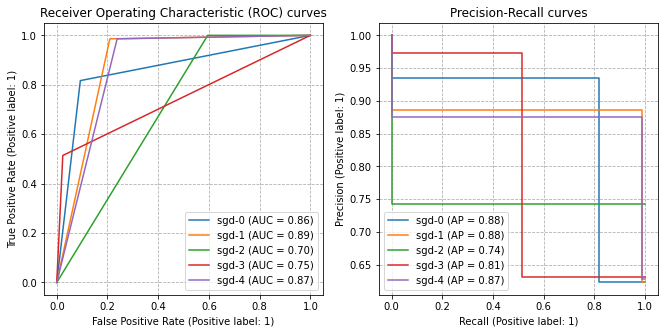

In [8]:
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))

for split_no, (train_split, test_split) in enumerate(skfold.split(X, y)):
    sgd = SGDClassifier(loss="log")
    sgd.fit(X[train_split], y[train_split])

    plot_roc_curve(sgd, X[test_split], y[test_split], ax=ax_roc, name=f"sgd-{split_no}")
    plot_precision_recall_curve(sgd, X[test_split], y[test_split], ax=ax_pr, name=f"sgd-{split_no}")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_pr.set_title('Precision-Recall curves')

ax_roc.grid(linestyle='--')
ax_pr.grid(linestyle='--')

plt.legend()
plt.show()

Maybe plot Precision-Recall curves one by one.

### Regression example

In [9]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [10]:
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDRegressor

In [11]:
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html

def load_mtpl2(n_samples=100000):
    """Fetch the French Motor Third-Party Liability Claims dataset.

    Parameters
    ----------
    n_samples: int, default=100000
      number of samples to select (for faster run time). Full dataset has
      678013 samples.
    """
    # freMTPL2freq dataset from https://www.openml.org/d/41214
    df_freq = fetch_openml(data_id=41214, as_frame=True)['data']
    df_freq['IDpol'] = df_freq['IDpol'].astype(int)
    df_freq.set_index('IDpol', inplace=True)

    # freMTPL2sev dataset from https://www.openml.org/d/41215
    df_sev = fetch_openml(data_id=41215, as_frame=True)['data']

    # sum ClaimAmount over identical IDs
    df_sev = df_sev.groupby('IDpol').sum()

    df = df_freq.join(df_sev, how="left")
    df["ClaimAmount"].fillna(0, inplace=True)

    # unquote string fields
    for column_name in df.columns[df.dtypes.values == object]:
        df[column_name] = df[column_name].str.strip("'")
    return df.iloc[:n_samples]

In [12]:
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html

df = load_mtpl2(n_samples=60000)

# Note: filter out claims with zero amount, as the severity model
# requires strictly positive target values.
df.loc[(df["ClaimAmount"] == 0) & (df["ClaimNb"] >= 1), "ClaimNb"] = 0

# Correct for unreasonable observations (that might be data error)
# and a few exceptionally large claim amounts
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)
df["ClaimAmount"] = df["ClaimAmount"].clip(upper=200000)

/home/alexburlacu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
from functools import partial

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer


log_scale_transformer = make_pipeline(
    FunctionTransformer(func=np.log),
    StandardScaler()
)

column_trans = ColumnTransformer(
    [
        ("binned_numeric", KBinsDiscretizer(n_bins=10),
            ["VehAge", "DrivAge"]),
        ("onehot_categorical", OneHotEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"]),
        ("passthrough_numeric", "passthrough",
            ["BonusMalus"]),
        ("log_scaled_numeric", log_scale_transformer,
            ["Density"]),
    ],
    remainder="drop",
)

# Insurances companies are interested in modeling the Pure Premium, that is
# the expected total claim amount per unit of exposure for each policyholder
# in their portfolio:
df["PurePremium"] = df["ClaimAmount"] / df["Exposure"]

# This can be indirectly approximated by a 2-step modeling: the product of the
# Frequency times the average claim amount per claim:
df["Frequency"] = df["ClaimNb"] / df["Exposure"]
df["AvgClaimAmount"] = df["ClaimAmount"] / np.fmax(df["ClaimNb"], 1)

In [14]:
# https://medium.com/analytics-vidhya/probabilistic-model-selection-with-aic-bic-in-python-f8471d6add32

def adj_r2(y, y_hat, X):
    r2 = r2_score(y, y_hat)
    n, p = X.shape[0], X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


def aic(y, y_hat, X):
    return 2 * X.shape[1] - 2 * np.log(mean_squared_error(y, y_hat))


def aic_c(y, y_hat, X):
    k, n = X.shape[1], X.shape[0]
    return aic(y, y_hat, X) + (2 * k * k + 2 * k) / (n - k - 1)


def bic(y, y_hat, X):
    return np.log(X.shape[0]) * X.shape[1] - 2 * np.log(mean_squared_error(y, y_hat))

In [15]:
X = column_trans.fit_transform(df)
y = df.ClaimAmount.values

skfold = KFold()
metrics = {"rmse": [], "mape": [], "r2": []}

for train_split, test_split in skfold.split(X, y):
    sgd = SGDRegressor(max_iter=10_000)
    sgd.fit(X[train_split], y[train_split])
    pred = sgd.predict(X[test_split])
    
    pred_ = sgd.predict(X[train_split])
    print(adj_r2(y[train_split], pred_, X[train_split]))
    print(aic(y[train_split], pred_, X[train_split]))
    print(aic_c(y[train_split], pred_, X[train_split]))
    print(bic(y[train_split], pred_, X[train_split]))
    print()
    
    metrics["rmse"].append(mean_squared_error(y[test_split], pred, squared=False))
    metrics["mape"].append(mean_absolute_percentage_error(y[test_split], pred))
    metrics["r2"].append(r2_score(y[test_split], pred))

/home/alexburlacu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


-2139347.8800174287
88.6350282349136
88.86664012849732
738.2777936867757

-0.5715610409214309
116.90185907101156
117.13347096459528
766.5446245228736

-2739208.323077036
88.3518849245313
88.58349681811502
737.9946503763933

-1.1669601839791555
116.18248880786788
116.4141007014516
765.82525425973

-0.8207051559219851
117.26699538693177
117.49860728051549
766.9097608387938



In [16]:
for k, vs in metrics.items():
    print(k)
    [print(f"On split {idx}:\n", v) for idx, v in enumerate(vs)]
    print("\n\n")

rmse
On split 0:
 10542191.07778238
On split 1:
 2174.767380749238
On split 2:
 3860657.352362344
On split 3:
 2494.754642231387
On split 4:
 2771.365401264528



mape
On split 0:
 5.552274057471944e+21
On split 1:
 2.7868873610018954e+18
On split 2:
 1.5830994738277673e+21
On split 3:
 5.066314525437114e+18
On split 4:
 2.1671396313207089e+18



r2
On split 0:
 -48298023.730262846
On split 1:
 -0.9388499387109799
On split 2:
 -3962174.00165002
On split 3:
 -2.321341454321909
On split 4:
 -0.1829809440941259





See also:
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
- https://danilzherebtsov.medium.com/continuous-data-stratification-c121fc91964b
- https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html
- https://stackoverflow.com/questions/54945196/sklearn-stratified-k-fold-cv-with-linear-model-like-elasticnetcv
